In [31]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [2]:
df = pd.read_csv('players.csv')

C:\Users\bogoj\AppData\Local\Temp\ipykernel_28980\3006090364.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('players.csv')


In [3]:
df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [8]:
X,y = make_blobs(n_samples=150,n_features=2,centers=10,cluster_std=0.5,shuffle=True,random_state=0)

In [14]:
km = KMeans(n_init=10)

In [15]:
km.fit(X)

KMeans(n_init=10)

In [18]:
km.labels_

array([1, 0, 6, 2, 5, 2, 4, 0, 2, 1, 1, 6, 5, 1, 1, 6, 6, 1, 1, 5, 1, 3,
       5, 3, 7, 0, 7, 4, 1, 3, 1, 7, 6, 4, 3, 6, 0, 0, 7, 1, 0, 0, 6, 7,
       0, 3, 7, 6, 6, 7, 1, 1, 4, 1, 1, 1, 6, 2, 5, 5, 5, 4, 0, 5, 5, 3,
       0, 7, 4, 4, 4, 2, 1, 4, 4, 4, 2, 4, 6, 7, 3, 4, 7, 6, 1, 1, 2, 1,
       5, 6, 4, 4, 4, 1, 6, 5, 1, 2, 4, 4, 2, 1, 1, 2, 2, 5, 4, 3, 2, 5,
       1, 4, 3, 7, 0, 1, 7, 4, 4, 2, 1, 3, 1, 4, 4, 1, 4, 3, 3, 3, 7, 3,
       4, 0, 0, 0, 2, 5, 5, 6, 1, 7, 7, 4, 3, 2, 0, 4, 4, 4])

In [19]:
km.cluster_centers_

array([[-9.8012195 ,  6.69848232],
       [-0.27669223,  3.7191277 ],
       [-8.61357809, -8.37918497],
       [ 9.20979187, -2.23316647],
       [ 0.16534059,  8.32035634],
       [ 1.84047431,  0.77684836],
       [ 5.49108568,  7.48404993],
       [ 5.72273838,  0.37028426]])

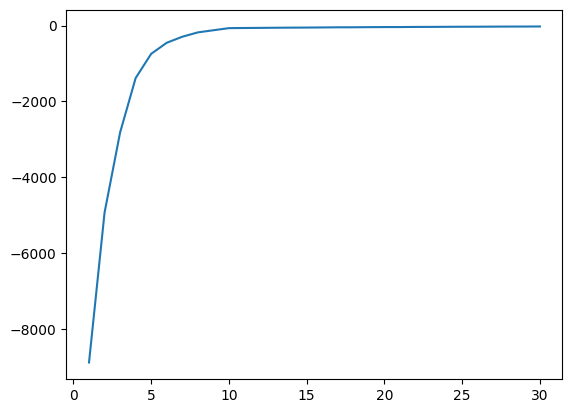

In [27]:
results = []
for k in range(1, 31):
    km = KMeans(n_clusters=k,n_init=10).fit(X)
    results.append(km.score(X))
    
plt.plot(range(1, 31) ,results)

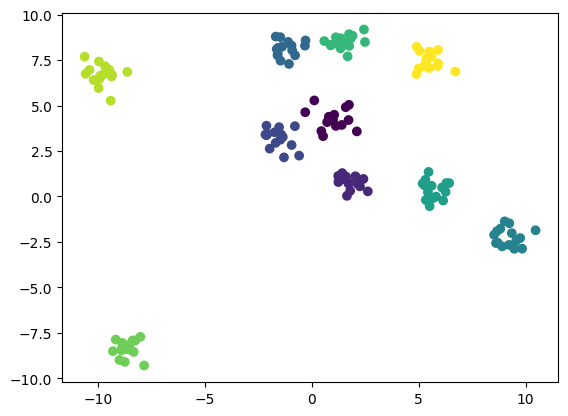

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

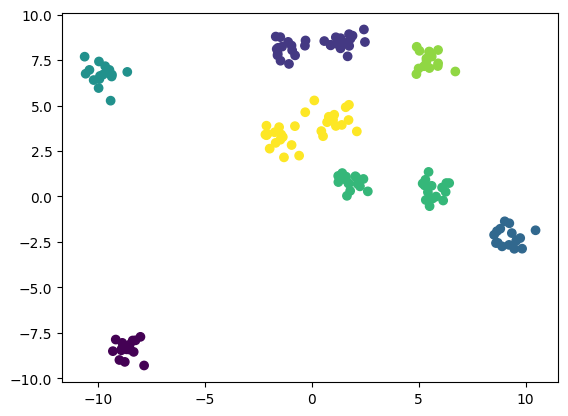

In [29]:
km = KMeans(n_clusters=7,n_init=10).fit(X)
y2 = km.labels_
plt.scatter(X[:, 0], X[:, 1], c=y2, cmap='viridis')

In [ ]:
def recursive_clustering(X):
    km = KMeans(n_clusters=2,n_init=10).fit(X)
    X0 = [x if y == 0 for x, y in zip(X, km.lables_)]
    X1 = [x if y == 1 for x, y in zip(X, km.lables_)]
    
    dist0 = [np.linalg.norm(x, km.cluster_centers_[0]) for x in X0]
    dist1 = [np.linalg.norm(x, km.cluster_centers_[1]) for x in X1]
    
    stat, p = shapiro(dist0)
    if p > 0.05:
        #git
        pass
    else:
        recursive_clustering(X0)#przypisać
    #dodać returny